In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df=pd.read_csv('imdb_top_1000.csv')

In [3]:
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [6]:
df.duplicated().sum()

0

In [7]:
df.describe()

,IMDB_Rating,Meta_score,No_of_Votes
count,1000.000000,843.000000,1.000000e+03
mean,7.949300,77.971530,2.736929e+05
std,0.275491,12.376099,3.273727e+05
min,7.600000,28.000000,2.508800e+04
25%,7.700000,70.000000,5.552625e+04
50%,7.900000,79.000000,1.385485e+05
75%,8.100000,87.000000,3.741612e+05
max,9.300000,100.000000,2.343110e+06


In [8]:
df['Released_Year'].dtypes

dtype('O')

In [9]:
df['Released_Year']=pd.to_numeric(df['Released_Year'],errors='coerce')

In [10]:
df=df.dropna(subset=['Released_Year'])

In [11]:
df['Released_Year'] = df['Released_Year'].astype('int')

In [12]:
df['Released_Year'].dtypes

dtype('int32')

In [13]:
df.head(1)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"


In [34]:
df['Certificate'].unique()

array(['A', 'UA', 'U', 'PG-13', 'R', 'PG', 'G', 'Passed', 'TV-14', '16',
       'TV-MA', 'Unrated', 'GP', 'Approved', 'TV-PG'], dtype=object)

In [35]:
df['Genre'].nunique()

183

### Dropping the Column

In [14]:
cols = ['Poster_Link','Runtime','Overview','Meta_score','Director','Star2','Star3','Star4','Gross']
df.drop(cols, axis = 1, inplace = True)
df.columns

Index(['Series_Title', 'Released_Year', 'Certificate', 'Genre', 'IMDB_Rating',
       'Star1', 'No_of_Votes'],
      dtype='object')

In [15]:
df['IMDB_Rating'].describe()

count    999.000000
mean       7.949650
std        0.275407
min        7.600000
25%        7.700000
50%        7.900000
75%        8.100000
max        9.300000
Name: IMDB_Rating, dtype: float64

### Categorizing 'IMDB_Ratings' Column 
#### we would cut the 'IMDB_Ratings' and make the 4 categories, 'popular','average','below-average','not-popular'
#### to describe it more using categorize_col() function

In [16]:
def categorize_col(df,col,labels):
    edges =sorted(set([
    df[col].describe()['min'],
    df[col].describe()['25%'],
    df[col].describe()['50%'],
    df[col].describe()['75%'],
    df[col].describe()['max'],
    ]))
    df[col] = pd.cut(df[col], edges, labels=labels, duplicates = 'drop')
    return df

In [17]:
labels = ['not popular','below-average','average','popular']
categorize_col(df, 'IMDB_Rating', labels)
df['IMDB_Rating'].unique()

['popular', 'average', 'below-average', 'not popular', NaN]
Categories (4, object): ['not popular' < 'below-average' < 'average' < 'popular']

In [18]:
df['IMDB_Rating'].value_counts()

IMDB_Rating
average          268
below-average    257
popular          195
not popular      157
Name: count, dtype: int64

In [19]:
df.dropna(inplace=True)
df.isna().sum()

Series_Title     0
Released_Year    0
Certificate      0
Genre            0
IMDB_Rating      0
Star1            0
No_of_Votes      0
dtype: int64

In [20]:
df['Genre']=df['Genre'].astype('category')
df.dtypes

Series_Title       object
Released_Year       int32
Certificate        object
Genre            category
IMDB_Rating      category
Star1              object
No_of_Votes         int64
dtype: object

# Data Visualization

In [21]:
sns.set_style('whitegrid')

## What is the most frequent genre of movies release on Netflix ?

In [22]:
df['Genre'].describe()

count       785
unique      183
top       Drama
freq         61
Name: Genre, dtype: object

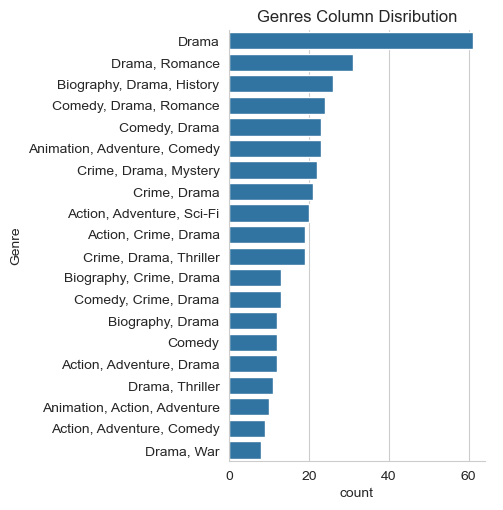

In [23]:
top_genres = df['Genre'].value_counts().head(20).index
sns.catplot(y='Genre', data=df[df['Genre'].isin(top_genres)], kind='count',order= top_genres)
plt.title('Genres Column Disribution')
plt.show()

## Which movie has highest ratings? 

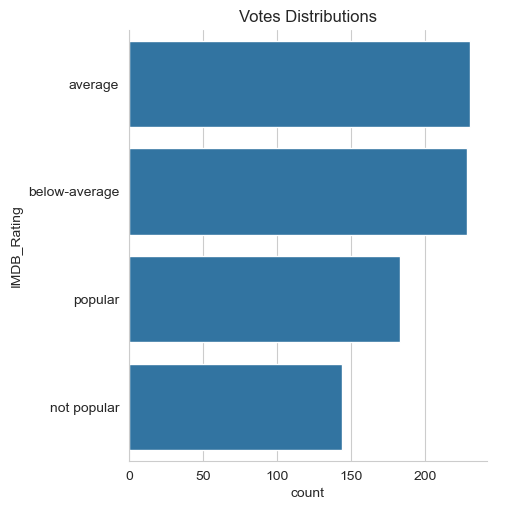

In [51]:
sns.catplot(y='IMDB_Rating', data=df, kind='count',order=df['IMDB_Rating'].value_counts().index)
plt.title('Votes Distributions')
plt.show()

## Which movie got Highest popularity? what's its genre?

In [25]:
df[df['No_of_Votes']==df['No_of_Votes'].max()]

,Series_Title,Released_Year,Certificate,Genre,IMDB_Rating,Star1,No_of_Votes
0,The Shawshank Redemption,1994,A,Drama,popular,Tim Robbins,2343110


## Which movie got Lowest popularity? what's its genre?

In [26]:
df[df['No_of_Votes']==df['No_of_Votes'].min()]

,Series_Title,Released_Year,Certificate,Genre,IMDB_Rating,Star1,No_of_Votes
264,Ba wang bie ji,1993,R,"Drama, Music, Romance",average,Leslie Cheung,25088


## Which year has the most filmed movie?

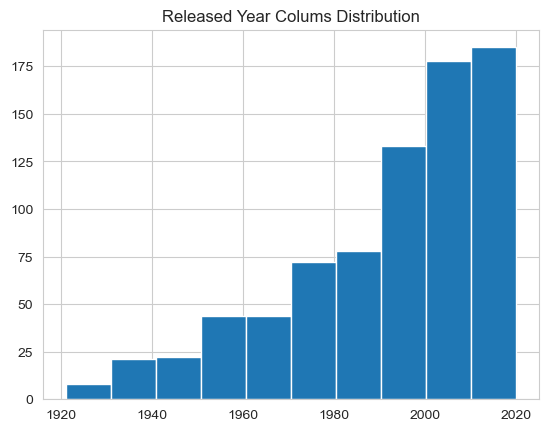

In [32]:
df['Released_Year'].hist()
plt.title('Released Year Distribution')
plt.show()

## Cerificate distribution

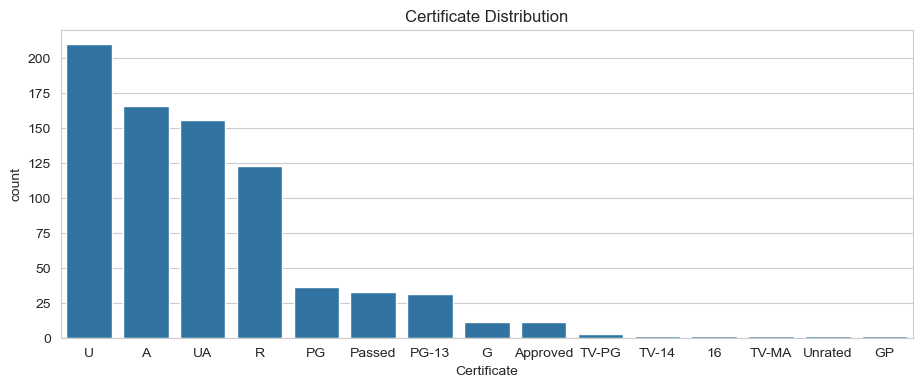

In [45]:
plt.figure(figsize=(11,4))
sns.countplot(data=df, x='Certificate', order=df['Certificate'].value_counts().index)
plt.title('Certificate Distribution')
plt.show()

## Lead Actors Distribution

In [58]:
df['Star1'].nunique()

528

<Axes: ylabel='Star1'>

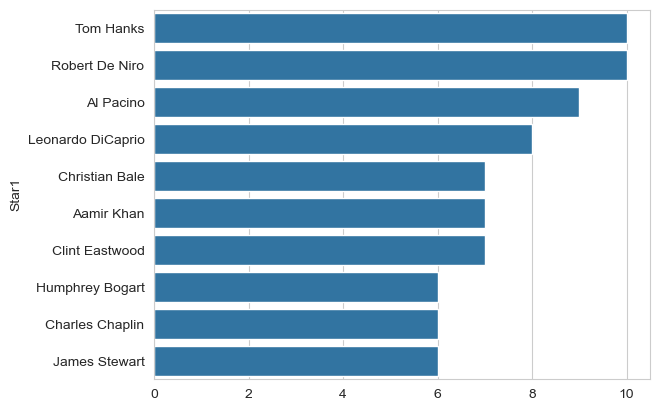

In [59]:
top_actor = df['Star1'].value_counts().head(10)
sns.barplot(x=top_actor.values,y=top_actor.index)